# Naive Bayes template

## =============== import the data set ==========

In [1]:
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv', header = 0)
x = dataset.iloc[:, 2:4].values 
y = dataset.iloc[:, -1].values

## ======== Splitting the dataset ========

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

## ====== Feature Scaling ======

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## ======== Applying Grid Search to find the best model and the best parameters ========

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
parameters = [{'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8]}]
grid_search = GridSearchCV(estimator = GaussianNB(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('The best accuracy:', best_accuracy)
print('The best parameters:', best_parameters)

The best accuracy: 0.8733333333333333
The best parameters: {'var_smoothing': 1e-11}


/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## ======= Applying the best parameters found in the grid search =====

In [5]:
classifier = GaussianNB(var_smoothing=1e-11)
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-11)

## ===== Visualize the training and test sets =========

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


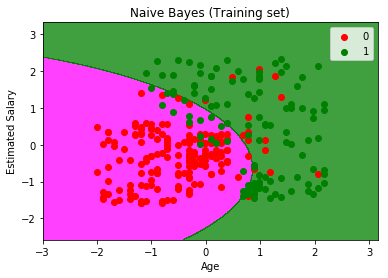

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


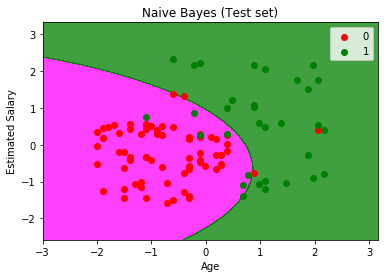

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
train_test_sets = {'Training': (x_train, y_train), 'Test': (x_test, y_test)}
for sets in ['Training', 'Test']:
    X_set, y_set = train_test_sets[sets]
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('magenta', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
        plt.title('Naive Bayes ('+sets+' set)')
        plt.xlabel('Age')
        plt.ylabel('Estimated Salary')
        plt.legend()
    plt.show()

## ======== Applying the K-Fold cross validation ======

In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print ('The averaged accuracy is %f, and\n std is %f.\n'%(accuracies.mean(), accuracies.std()))

The averaged accuracy is 0.873871, and
 std is 0.087709.



## ======= Predict the training and test sets results ======

In [8]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

## ======== Making the confusion matrix =====

In [9]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train, labels=[0, 1])
cm_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1]) #lables indicate the order of the results
print ('The accuracy for the training set is %f.\n'%((cm_train[0][0]+cm_train[1][1])/(x_train.shape[0])))
print ('The accuracy for the test set is %f.\n'%((cm_test[0][0]+cm_test[1][1])/(sum(sum(cm_test)))))

The accuracy for the training set is 0.883333.

The accuracy for the test set is 0.900000.

